In [ ]:
# #ignore this cell
# #APPLYING SENTIMENT ANALYSIS AND PREPROCESSING
# import pandas as pd
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# # Download NLTK resources
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('vader_lexicon')

# # Sample text cleaning function
# def clean_text(text):
#     # Remove URLs
#     text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

#     # Remove mentions and hashtags
#     text = re.sub(r'\@\w+|\#\w+', '', text)

#     # Remove special characters and numbers
#     text = re.sub(r'[^a-zA-Z\s]', '', text)

#     # Convert to lowercase
#     text = text.lower()

#     # Tokenization
#     tokens = word_tokenize(text)

#     # Remove stop words
#     stop_words = set(stopwords.words('english'))
#     tokens = [token for token in tokens if token not in stop_words]

#     # Stemming (you can also use lemmatization)
#     stemmer = PorterStemmer()
#     tokens = [stemmer.stem(token) for token in tokens]

#     # Join tokens back into text
#     cleaned_text = ' '.join(tokens)

#     return cleaned_text

# # Sample sentiment analysis function
# def analyze_sentiment(text):
#     sid = SentimentIntensityAnalyzer()
#     compound_score = sid.polarity_scores(text)['compound']

#     if compound_score >= 0.05:
#         return 'Positive'
#     elif compound_score <= -0.05:
#         return 'Negative'
#     else:
#         return 'Neutral'

# # Load your CSV file into a pandas DataFrame
# csv_file_path = '/content/newdataset.csv'  # Replace with your CSV file path
# df = pd.read_csv(csv_file_path, encoding='latin1')


# # Apply the clean_text function to the 'text' column in your DataFrame
# df['cleaned_text'] = df['full_text'].apply(clean_text)

# # Apply sentiment analysis to the cleaned data
# df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

# # Save the results back to a new CSV file
# output_csv_path = '/content/cleanednewdataset.csv'
# df.to_csv(output_csv_path, index=False)

# # Display the first few rows of the DataFrame with sentiment analysis results
# print(df[['full_text', 'sentiment']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                           full_text sentiment
0  BREAKING: #SCOTUS to hear case on mifepristone...  Positive
1  UPDATE: After a week of legal whiplash and thr...  Positive
2  BREAKING: Late tonight, the Texas Supreme Cour...  Positive
3  We are talking about urgent medical care. Kat...  Positive
4  BREAKING: The Fifth Circuit just DENIED Missis...  Negative


In [ ]:
print("File Path:", csv_file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import string
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/cleaned compiled dataset.csv')  # Replace 'your_data.csv' with the actual file name

# Assuming 'text_column' is the name of the column containing the text data
text_column = 'cleaned_text'  # Change this to the appropriate column name

# Convert text to lowercase
df[text_column] = df[text_column].str.lower()

# Remove punctuation
df[text_column] = df[text_column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenize the text
df['tokenized_text'] = df[text_column].apply(lambda x: word_tokenize(x, "english"))

# Remove stop words
stop_words = set(stopwords.words('english'))
df['final_words'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
df['lemma_words'] = df['final_words'].apply(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])

# Output the processed DataFrame
print(df.head())  # Display the first few rows of the DataFrame

# Additional analysis or visualization can be performed here using the processed data in the DataFrame


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                        cleaned_text  \
0  mark second anniversari sinc roe fell pcc prou...   
1  abort healthcar join volunt donat abort right ...   
2  year ago today savita halappanavar went irish ...   
3                      time congrat northern ireland   
4  urgent updat today woman england face sentenc ...   

                                      tokenized_text  \
0  [mark, second, anniversari, sinc, roe, fell, p...   
1  [abort, healthcar, join, volunt, donat, abort,...   
2  [year, ago, today, savita, halappanavar, went,...   
3                 [time, congrat, northern, ireland]   
4  [urgent, updat, today, woman, england, face, s...   

                                         final_words  \
0  [mark, second, anniversari, sinc, roe, fell, p...   
1  [abort, healthcar, join, volunt, donat, abort,...   
2  [year, ago, today, savita, halappanavar, went,...   
3                 [time, congrat, northern, ireland]   
4  [urgent, updat, today, woman, england, face

In [ ]:
df.head(100)

,cleaned_text,tokenized_text,final_words,lemma_words
0,mark second anniversari sinc roe fell pcc prou...,"[mark, second, anniversari, sinc, roe, fell, p...","[mark, second, anniversari, sinc, roe, fell, p...","[mark, second, anniversari, sinc, roe, fell, p..."
1,abort healthcar join volunt donat abort right ...,"[abort, healthcar, join, volunt, donat, abort,...","[abort, healthcar, join, volunt, donat, abort,...","[abort, healthcar, join, volunt, donat, abort,..."
2,year ago today savita halappanavar went irish ...,"[year, ago, today, savita, halappanavar, went,...","[year, ago, today, savita, halappanavar, went,...","[year, ago, today, savita, halappanavar, went,..."
3,time congrat northern ireland,"[time, congrat, northern, ireland]","[time, congrat, northern, ireland]","[time, congrat, northern, ireland]"
4,urgent updat today woman england face sentenc ...,"[urgent, updat, today, woman, england, face, s...","[urgent, updat, today, woman, england, face, s...","[urgent, updat, today, woman, england, face, s..."
...,...,...,...,...
95,send collect within famili seamless youd expec...,"[send, collect, within, famili, seamless, youd...","[send, collect, within, famili, seamless, youd...","[send, collect, within, famili, seamless, youd..."
96,detail everywher,"[detail, everywher]","[detail, everywher]","[detail, everywher]"
97,possibl chang app icon use famili new set scre...,"[possibl, chang, app, icon, use, famili, new, ...","[possibl, chang, app, icon, use, famili, new, ...","[possibl, chang, app, icon, use, famili, new, ..."
98,new version famili avail via testflight big on...,"[new, version, famili, avail, via, testflight,...","[new, version, famili, avail, via, testflight,...","[new, version, famili, avail, via, testflight,..."


In [ ]:
df.columns

Index(['cleaned_text', 'tokenized_text', 'final_words', 'lemma_words'], dtype='object')

In [ ]:
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
nltk.download('vader_lexicon')


# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each row in the DataFrame
df['vader_scores'] = df['cleaned_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Define labels based on VADER compound scores
# Define a function to label sentiment based on VADER compound scores
def label_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the label_sentiment function to create sentiment labels based on VADER compound scores
df['sentiment_label'] = df['vader_scores'].apply(label_sentiment)


# Assuming you have a DataFrame df with a column 'sentiment_label' containing sentiment labels

# Define a mapping dictionary
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': 2}

# Apply the mapping to create a new column 'sentiment_class'
df['sentiment_class'] = df['sentiment_label'].map(sentiment_mapping)

# Display the updated DataFrame
print(df)

# Save the results back to a new CSV file
output_csv_path = '/content/Vaderrr.csv'
df.to_csv(output_csv_path, index=False)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          cleaned_text  \
0    mark second anniversari sinc roe fell pcc prou...   
1    abort healthcar join volunt donat abort right ...   
2    year ago today savita halappanavar went irish ...   
3                        time congrat northern ireland   
4    urgent updat today woman england face sentenc ...   
..                                                 ...   
796  donat texa abort fund today late donat divid f...   
797  break missouri refus renew licens state abort ...   
798  actual feel realli good abl take part normalis...   
799  femin doesnt includ tran women girl femin femi...   
800                  offici elect women congress right   

                                        tokenized_text  \
0    [mark, second, anniversari, sinc, roe, fell, p...   
1    [abort, healthcar, join, volunt, donat, abort,...   
2    [year, ago, today, savita, halappanavar, went,...   
3                   [time, congrat, northern, ireland]   
4    [urgent,

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming you have a DataFrame df with a column 'text' containing the text data

# Convert the 'text' column to a list of strings
text_data = df['final_words'].tolist()
text_data = [str(text) for text in text_data]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the entire text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Convert the TF-IDF matrix to a DataFrame for easier viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)


     abel  abhorr  abid  abil       abl  ableist     abort  abortiona  \
0     0.0     0.0   0.0   0.0  0.000000      0.0  0.000000        0.0   
1     0.0     0.0   0.0   0.0  0.000000      0.0  0.203209        0.0   
2     0.0     0.0   0.0   0.0  0.000000      0.0  0.085466        0.0   
3     0.0     0.0   0.0   0.0  0.000000      0.0  0.000000        0.0   
4     0.0     0.0   0.0   0.0  0.000000      0.0  0.000000        0.0   
..    ...     ...   ...   ...       ...      ...       ...        ...   
796   0.0     0.0   0.0   0.0  0.000000      0.0  0.073156        0.0   
797   0.0     0.0   0.0   0.0  0.000000      0.0  0.156727        0.0   
798   0.0     0.0   0.0   0.0  0.251112      0.0  0.000000        0.0   
799   0.0     0.0   0.0   0.0  0.000000      0.0  0.000000        0.0   
800   0.0     0.0   0.0   0.0  0.000000      0.0  0.000000        0.0   

     abortioninduc  absolut  ...  youth  youv   yr  yrlong  yrold  zahara  \
0              0.0      0.0  ...    0.0   0.0 

In [ ]:
tfidf_df

,abel,abhorr,abid,abil,abl,ableist,abort,abortiona,abortioninduc,absolut,...,youth,youv,yr,yrlong,yrold,zahara,zahra,zealand,zora,zurawski
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.203209,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.085466,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,0.0,0.0,0.0,0.000000,0.0,0.073156,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.000000,0.0,0.156727,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.251112,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X_tfidf.shape)
print(df['sentiment_class'].shape)

(801, 2371)
(801,)


In [ ]:
X=tfidf_df
y = df['sentiment_class']

In [ ]:


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled, y_resampled)


      abel  abhorr  abid  abil  abl  ableist     abort  abortiona  \
0      0.0     0.0   0.0   0.0  0.0      0.0  0.000000   0.000000   
1      0.0     0.0   0.0   0.0  0.0      0.0  0.203209   0.000000   
2      0.0     0.0   0.0   0.0  0.0      0.0  0.085466   0.000000   
3      0.0     0.0   0.0   0.0  0.0      0.0  0.000000   0.000000   
4      0.0     0.0   0.0   0.0  0.0      0.0  0.000000   0.000000   
...    ...     ...   ...   ...  ...      ...       ...        ...   
1240   0.0     0.0   0.0   0.0  0.0      0.0  0.086745   0.000000   
1241   0.0     0.0   0.0   0.0  0.0      0.0  0.000000   0.000000   
1242   0.0     0.0   0.0   0.0  0.0      0.0  0.000000   0.000000   
1243   0.0     0.0   0.0   0.0  0.0      0.0  0.142983   0.000000   
1244   0.0     0.0   0.0   0.0  0.0      0.0  0.134120   0.058187   

      abortioninduc  absolut  ...  youth  youv   yr  yrlong  yrold  zahara  \
0               0.0      0.0  ...    0.0   0.0  0.0     0.0    0.0     0.0   
1              

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)
print(X_resampled, y_resampled)

      abel  abhorr  abid  abil  abl  ableist     abort  abortiona  \
0      0.0     0.0   0.0   0.0  0.0      0.0  0.000000        0.0   
1      0.0     0.0   0.0   0.0  0.0      0.0  0.203209        0.0   
2      0.0     0.0   0.0   0.0  0.0      0.0  0.085466        0.0   
3      0.0     0.0   0.0   0.0  0.0      0.0  0.000000        0.0   
4      0.0     0.0   0.0   0.0  0.0      0.0  0.000000        0.0   
...    ...     ...   ...   ...  ...      ...       ...        ...   
1235   0.0     0.0   0.0   0.0  0.0      0.0  0.128911        0.0   
1236   0.0     0.0   0.0   0.0  0.0      0.0  0.000000        0.0   
1237   0.0     0.0   0.0   0.0  0.0      0.0  0.089959        0.0   
1238   0.0     0.0   0.0   0.0  0.0      0.0  0.091181        0.0   
1239   0.0     0.0   0.0   0.0  0.0      0.0  0.126304        0.0   

      abortioninduc  absolut  ...  youth  youv   yr  yrlong  yrold  zahara  \
0               0.0      0.0  ...    0.0   0.0  0.0     0.0    0.0     0.0   
1              

In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Print the shapes of the resulting training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (868, 2371)
X_test shape: (372, 2371)
y_train shape: (868,)
y_test shape: (372,)


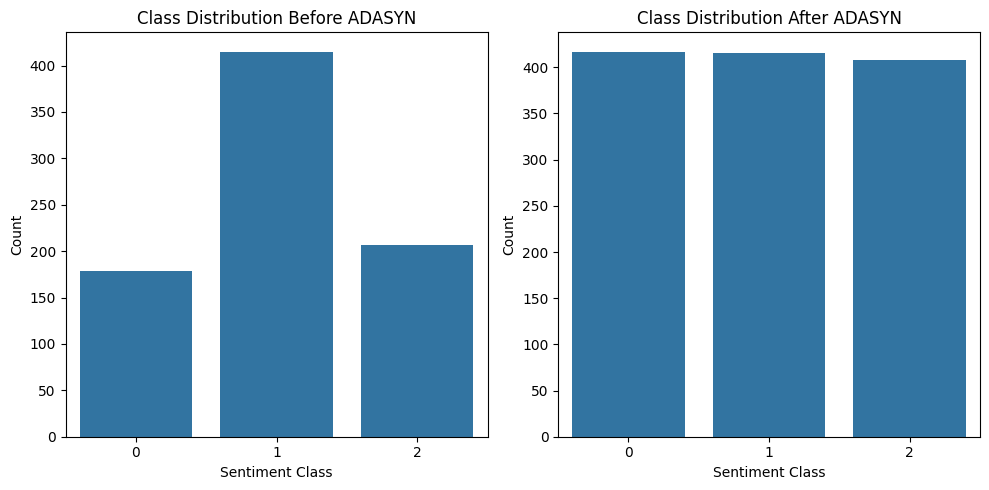

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class before and after ADASYN
original_class_counts = df['sentiment_class'].value_counts()
resampled_class_counts = y_resampled.value_counts()

# Plotting
plt.figure(figsize=(10, 5))

# Before ADASYN
plt.subplot(1, 2, 1)
sns.barplot(x=original_class_counts.index, y=original_class_counts.values)
plt.title('Class Distribution Before ADASYN')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')

# After ADASYN
plt.subplot(1, 2, 2)
sns.barplot(x=resampled_class_counts.index, y=resampled_class_counts.values)
plt.title('Class Distribution After ADASYN')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the resampled training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84       134
           1       0.78      0.83      0.81       126
           2       0.86      0.86      0.86       112

    accuracy                           0.83       372
   macro avg       0.84      0.83      0.83       372
weighted avg       0.83      0.83      0.83       372



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize Multinomial Naive Bayes model
nb_classifier = MultinomialNB()

# Train the model on the resampled training data
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.69      0.78       134
           1       0.74      0.75      0.75       126
           2       0.74      0.90      0.81       112

    accuracy                           0.78       372
   macro avg       0.78      0.78      0.78       372
weighted avg       0.79      0.78      0.78       372



In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

# Initialize Bernoulli Naive Bayes model
nb_classifier = BernoulliNB()

# Train the model on the resampled training data
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.86      0.86       134
           1       0.77      0.81      0.79       126
           2       0.88      0.82      0.85       112

    accuracy                           0.83       372
   macro avg       0.83      0.83      0.83       372
weighted avg       0.83      0.83      0.83       372



In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report

# Initialize Complement Naive Bayes model
nb_classifier = ComplementNB()

# Train the model on the resampled training data
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.78      0.81       134
           1       0.76      0.75      0.76       126
           2       0.80      0.91      0.85       112

    accuracy                           0.81       372
   macro avg       0.81      0.81      0.81       372
weighted avg       0.81      0.81      0.81       372



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize Support Vector Classifier (SVC) model
svm_classifier = SVC()

# Train the model on the resampled training data
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.71      0.83       134
           1       0.68      0.98      0.81       126
           2       0.97      0.81      0.88       112

    accuracy                           0.83       372
   macro avg       0.88      0.84      0.84       372
weighted avg       0.88      0.83      0.84       372



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Train the model on the resampled training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       134
           1       0.87      0.83      0.85       126
           2       0.88      0.83      0.85       112

    accuracy                           0.85       372
   macro avg       0.86      0.85      0.85       372
weighted avg       0.86      0.85      0.85       372



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Initialize MLPClassifier model
mlp_classifier = MLPClassifier()

# Train the model on the resampled training data
mlp_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.83      0.82       134
           1       0.82      0.75      0.79       126
           2       0.85      0.91      0.88       112

    accuracy                           0.83       372
   macro avg       0.83      0.83      0.83       372
weighted avg       0.83      0.83      0.83       372



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier()

# Train the model on the resampled training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       134
           1       0.88      0.78      0.82       126
           2       0.84      0.85      0.84       112

    accuracy                           0.83       372
   macro avg       0.84      0.83      0.83       372
weighted avg       0.84      0.83      0.83       372

